2015-11-16 12:51:57,772 - modeltools.grid -   DEBUG: Initialized P-grid using projection +proj=stere +lon_0=0 +lat_0=60 +lat_ts=60 +ellps=sphere
DEBUG:modeltools.grid:Initialized P-grid using projection +proj=stere +lon_0=0 +lat_0=60 +lat_ts=60 +ellps=sphere
2015-11-16 12:51:57,774 - modeltools.grid -   DEBUG: Lower left corner lon/lat of grid: (-20,60)
DEBUG:modeltools.grid:Lower left corner lon/lat of grid: (-20,60)
2015-11-16 12:51:57,775 - modeltools.grid -   DEBUG: Grid spacing in projection coords: (4e+03,4e+03)
DEBUG:modeltools.grid:Grid spacing in projection coords: (4e+03,4e+03)
2015-11-16 12:51:57,776 - modeltools.grid -   DEBUG: Number of grid Nodes in x/y      : (  500,  300)
DEBUG:modeltools.grid:Number of grid Nodes in x/y      : (  500,  300)
2015-11-16 12:51:57,777 - modeltools.grid -   DEBUG: Min   x projection coordinate = -1.1e+06
DEBUG:modeltools.grid:Min   x projection coordinate = -1.1e+06
2015-11-16 12:51:57,778 - modeltools.grid -   DEBUG: Max   x projection coo

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


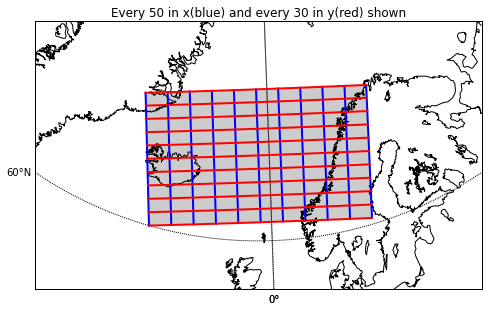

1 90.0
2 0.0


In [3]:
%load_ext autoreload
%autoreload 2
%matplotlib inline  

import modeltools.grid
import matplotlib.pyplot
import modeltools.hycom.io
import pylab
pylab.rcParams['figure.figsize'] = 12, 8

grid1=modeltools.grid.Proj4Grid("+proj=stere +lon_0=0 +lat_0=60 +lat_ts=60 +ellps=sphere",
                              -20,60,4000,4000,500,300)
#grid1.save_to_scrip("regionalocn.nc",None)
figure=grid1.plotgrid(2)
matplotlib.pyplot.show()
regf = modeltools.hycom.io.write_regional_grid(grid1)


DEBUG:root:Initialized P-grid using projection +proj=stere +lon_0=0 +lat_0=40 +lat_ts=40 +ellipse=sphere
DEBUG:root:Lower left corner lon/lat of grid: (-70,10)
DEBUG:root:Grid spacing in projection coords: (2e+04,2e+04)
DEBUG:root:Number of grid Nodes in x/y      : (  800,  400)
DEBUG:root:Min   x projection coordinate = -8.63e+06
DEBUG:root:Max   x projection coordinate = 7.39e+06
DEBUG:root:Min   y projection coordinate = -7.94e+05
DEBUG:root:Max   y projection coordinate = 7.23e+06
DEBUG:root:Min lon = -180
DEBUG:root:Max lon = 180
DEBUG:root:Min lat = 9.83
DEBUG:root:Max lat = 89.9


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
(402, 802) (802,) (402,)
testlon, testlat: -69.9660345706 10.1721716618
32000000 16000000
-13.7296964968 67.8515112853
(11, 11) (10, 10)


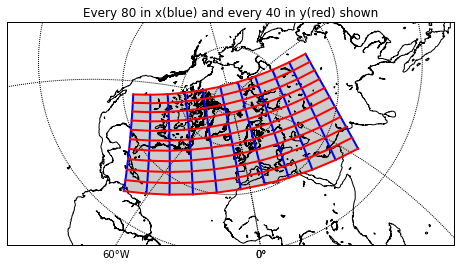

In [7]:
%load_ext autoreload
%autoreload 2
%matplotlib inline  

import modeltools.grid
import matplotlib.pyplot
grid2=modeltools.grid.Proj4Grid("+proj=stere +lon_0=0 +lat_0=40 +lat_ts=40 +ellipse=sphere",
                              -70,10,20000,20000,800,400)
figure=grid2.plotgrid(2)
matplotlib.pyplot.show()

In [8]:
import modeltools.hycom.io


grid1.write_my_projection_info()
regf = modeltools.hycom.io.write_regional_grid(grid1)
regf = modeltools.hycom.io.write_newpos(grid1)

grid1.Nx*grid1.Ny*8*2


DEBUG:root:Endianness set to big


1 90.0
2 0.0


2400000

(302, 502) (502,) (302,)
(11, 11) (10, 10)


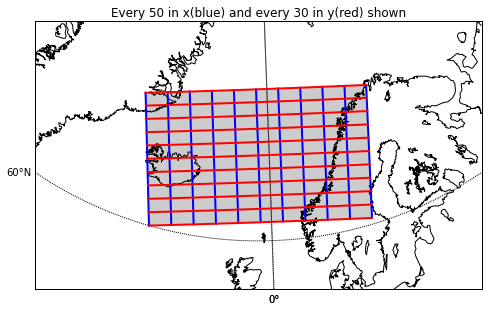

In [12]:
grid1 = modeltools.grid.Proj4Grid.grid_from_file(filename="proj.info")
figure=grid1.plotgrid(2)
matplotlib.pyplot.show()

In [10]:
run modeltools/test

DEBUG:root:Initialized P-grid using projection +proj=stere +lon_0=0 +lat_0=60 +lat_ts=60 +ellps=sphere
DEBUG:root:Lower left corner lon/lat of grid: (-20,60)
DEBUG:root:Grid spacing in projection coords: (4e+03,4e+03)
DEBUG:root:Number of grid Nodes in x/y      : (  500,  300)
DEBUG:root:Min   x projection coordinate = -1.1e+06
DEBUG:root:Max   x projection coordinate = 9.02e+05
DEBUG:root:Min   y projection coordinate = 1.64e+05
DEBUG:root:Max   y projection coordinate = 1.37e+06
DEBUG:root:Min lon = -29.6
DEBUG:root:Max lon = 24.8
DEBUG:root:Min lat = 60
DEBUG:root:Max lat = 72.3
.

(302, 502) (502,) (302,)
(302, 502)

DEBUG:root:Initialized P-grid using projection +proj=stere +lon_0=0 +lat_0=60 +lat_ts=60 +ellps=sphere
DEBUG:root:Lower left corner lon/lat of grid: (-20,60)
DEBUG:root:Grid spacing in projection coords: (4e+03,4e+03)
DEBUG:root:Number of grid Nodes in x/y      : (  500,  300)
DEBUG:root:Min   x projection coordinate = -1.1e+06
DEBUG:root:Max   x projection coordinate = 9.02e+05
DEBUG:root:Min   y projection coordinate = 1.64e+05
DEBUG:root:Max   y projection coordinate = 1.37e+06
DEBUG:root:Min lon = -29.6
DEBUG:root:Max lon = 24.8
DEBUG:root:Min lat = 60
DEBUG:root:Max lat = 72.3
.

 (502,) (302,)



----------------------------------------------------------------------
Ran 2 tests in 0.274s

OK


DEBUG:root:Endianness set to big


pattern :  ^(.*)'(idm   )'[ =]*
line    :  500   'idm   '
match: <_sre.SRE_Match object at 0x7f128ac1cc68>
pattern :  ^(.*)'(jdm   )'[ =]*
line    :  300   'jdm   '
match: <_sre.SRE_Match object at 0x7f128ac1cc68>
pattern :  ^(.*)'(mapflg)'[ =]*
line    :  -1   'mapflg'
match: <_sre.SRE_Match object at 0x7f128ac1cc68>
-29.4480991364 24.706987381
60.0 72.2169647217


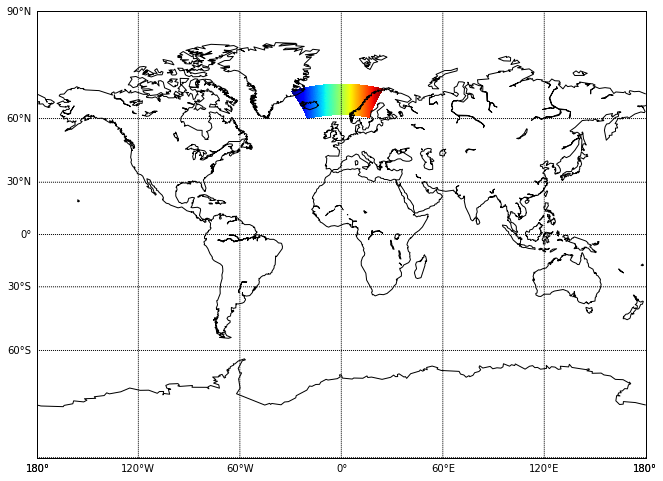

In [11]:
import numpy
from mpl_toolkits.basemap import Basemap
za = modeltools.hycom.io.ABFileRegionalGrid("regional.grid","r")
lo = za.readfield("plon")
la = za.readfield("plat")
m = Basemap(projection='mill')
x,y=m(lo,la)
m.drawcoastlines()
m.drawmapboundary() # draw a line around the map region
m.drawparallels(numpy.arange(-90.,120.,30.),labels=[1,0,0,0]) # draw parallels
m.drawmeridians(numpy.arange(0.,420.,60.),labels=[0,0,0,1]) # draw meridians
m.pcolormesh(x,y,lo)   
